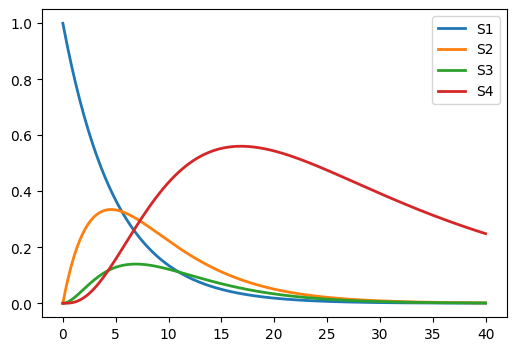

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tellurium as te

model = """
S1 -> S2; k1*S1
S2 -> S3; k2*S2;
S3 -> S4; k3*S3;
S4 -> S5; k4*S4;

S1 = 1;
S2 = 0;
S3 = 0;
S4 = 0;

k1 = 0.2;
k2 = 0.24;
k3 = 0.52;
k4 = 0.05;


"""

rr = te.loada(model)
data = rr.simulate(0, 40, 300, ['time', 'S1', 'S2', 'S3', 'S4'])
rr.plot()

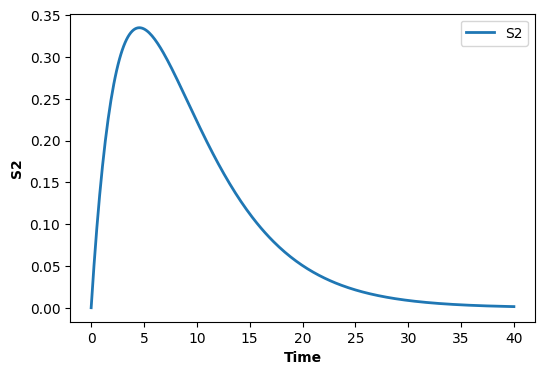

In [4]:
model = """
S1 -> S2; k1*S1
S2 -> S3; k2*S2;
S3 -> S4; k3*S3;
S4 -> S5; k4*S4;

S1 = 1;
S2 = 0;
S3 = 0;
S4 = 0;

k1 = 0.2;
k2 = 0.24;
k3 = 0.52;
k4 = 0.05;

"""
rr = te.loada(model)
data = rr.simulate(0, 40, 300, ['time','S2'])
rr.plot(xtitle='Time', ytitle='S2')

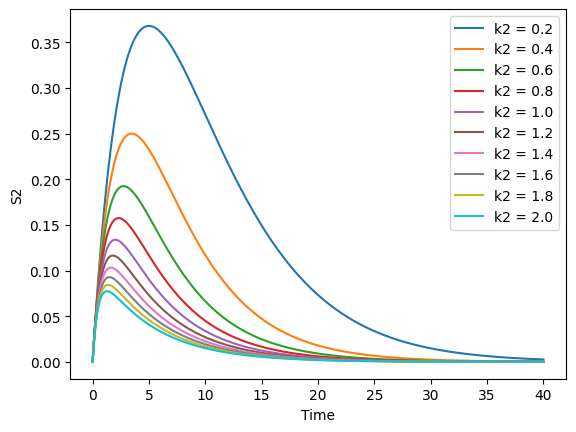

In [4]:
model = """
S1 -> S2; k1*S1
S2 -> S3; k2*S2;
S3 -> S4; k3*S3;
S4 -> S5; k4*S4;

S1 = 1;
S2 = 0;
S3 = 0;
S4 = 0;

k1 = 0.2;
k2 = 0.24;
k3 = 0.52;
k4 = 0.05;

"""

k2_values = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
results = []
plt.figure()

for k2 in k2_values:
    rr = te.loada(model)
    rr.k2 = k2
    rr.reset()
    data = rr.simulate(0, 40, 300, ['time', 'S2'])
    results.append(data)
    plt.plot(data['time'], data['S2'], label=f'k2 = {k2}')

plt.legend()
plt.xlabel('Time')
plt.ylabel('S2')
plt.show()

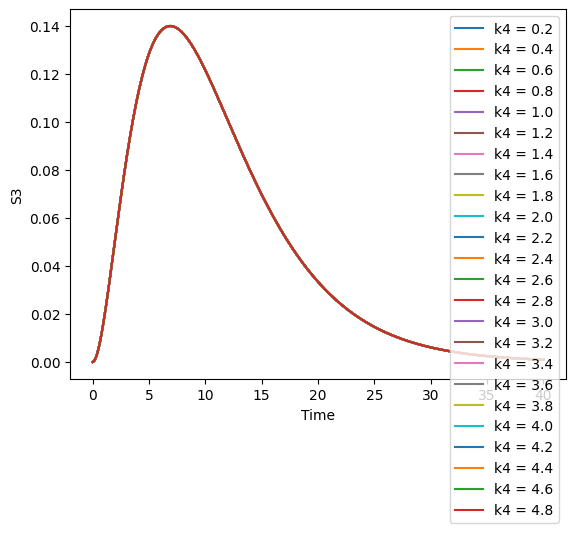

In [11]:
def scanParameter(speciesName, parameterName, low, high, stepSize):

    model = """
    S1 -> S2; k1*S1
    S2 -> S3; k2*S2;
    S3 -> S4; k3*S3;
    S4 -> S5; k4*S4;

    S1 = 1;
    S2 = 0;
    S3 = 0;
    S4 = 0;

    k1 = 0.2;
    k2 = 0.24;
    k3 = 0.52;
    k4 = 0.05;
    
    """

    rr = te.loada(model)

    parameter_values = []
    current_value = low
    while current_value <= high:
        parameter_values.append(current_value)
        current_value += stepSize

    results = []
    plt.figure()

    for value in parameter_values:
        rounded_value = np.round(value, 2)
        rr.setValue(parameterName, rounded_value)
        rr.reset()  
        data = rr.simulate(0, 40, 300, ['time', speciesName])
        results.append(data)
        plt.plot(data['time'], data[speciesName], label=f'{parameterName} = {rounded_value}')

    
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel(speciesName)
    plt.show()
    
scanParameter('S3', 'k4', 0.2, 5, 0.2)